In [2]:
import pandas as pd
df=pd.read_csv("smart_shop.csv",sep="\t")
#df.head()
# df.info()
#df.isna().sum()

In [3]:
X=df.drop("Revenue",axis=1)
y=df["Revenue"]
#one hot encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cat_colum=X.select_dtypes(include="object").columns
nume_col=X.select_dtypes(exclude="object").columns


preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_colum),
        ("num", "passthrough", nume_col)
    ]
)



In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.2,random_state=42
)

X_train_encoded=preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

model = DecisionTreeClassifier(random_state=0)
model.fit(X_train_encoded,y_train)
y_pred = model.predict(X_test_encoded)
print("f1_score",f1_score(y_test,y_pred))






f1_score 0.5665024630541872


In [8]:
#EDA
import matplotlib.pyplot as plt
import seaborn as sns
#df["Administrative"].mean()
df["Administrative_Duration"].skew()

np.float64(5.61571901877419)

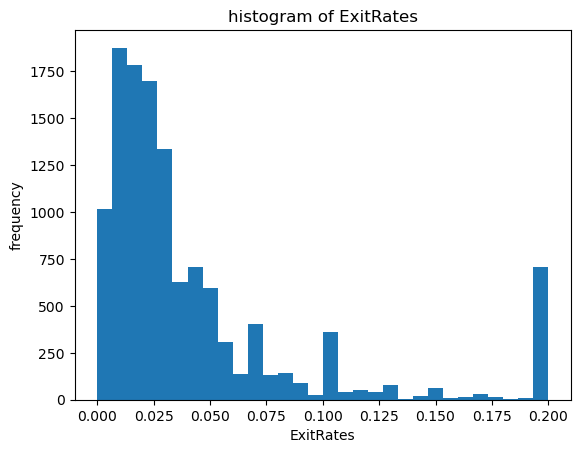

In [13]:
plt.hist(df["ExitRates"],bins=30)
plt.xlabel("ExitRates")
plt.ylabel("frequency")
plt.title("histogram of ExitRates")
plt.show()


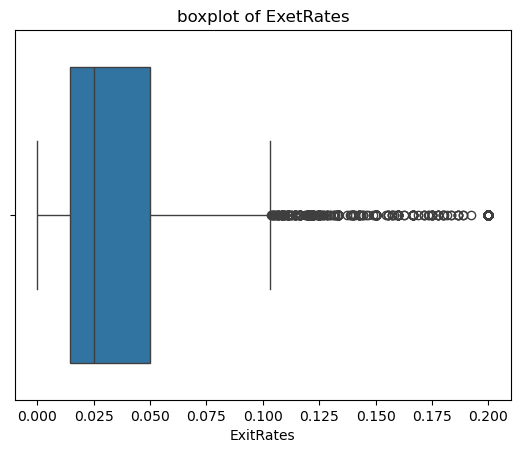

In [14]:
sns.boxplot(x=df["ExitRates"])
plt.title("boxplot of ExetRates")
plt.show()

In [16]:
df["ExitRates"].skew()

np.float64(2.1487889999009804)

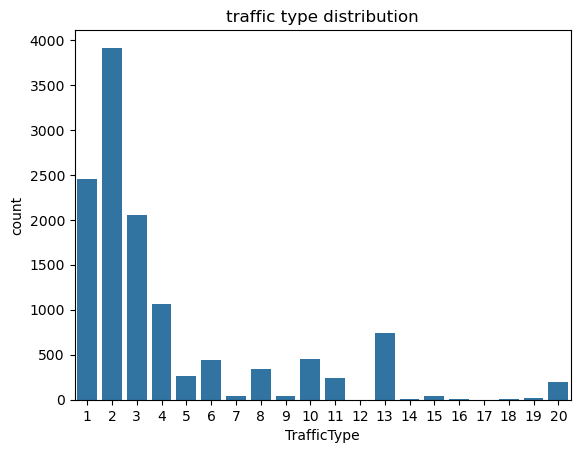

In [17]:
sns.countplot(x="TrafficType",data=df)
plt.title("traffic type distribution")
plt.show()

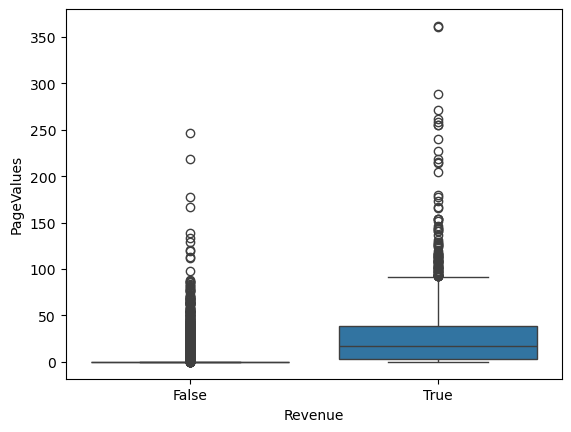

In [21]:
#bivariate analysis
# sns.boxplot(x="PageValues",data=df)
# plt.title("Count_of_page_visited  vs Revenue")
# plt.show()
sns.boxplot(x='Revenue', y='PageValues', data=df)
plt.show()

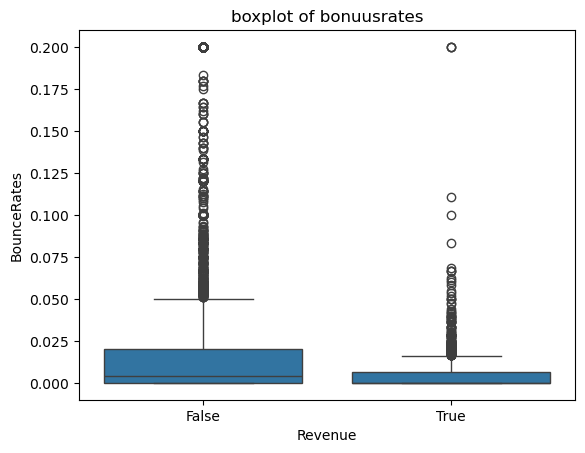

In [23]:
sns.boxplot(x="Revenue",y="BounceRates",data=df)
plt.title("boxplot of bonuusrates")
plt.show()